# 2.1 任务说明
任务主题：论文作者统计，统计所有论文作者出现评率Top10的姓名；

任务内容：论文作者的统计、使用 Pandas 读取数据并使用字符串操作；

任务成果：学习 Pandas 的字符串操作；

## 1 字符串处理
在Python中字符串是最常用的数据类型，可以使用引号('或")来创建字符串。Python中所有的字符都使用字符串存储，可以使用方括号来截取字符串，如下实例：

In [24]:
import numpy as np
import pandas as pd
import tqdm

var1 = 'Hello Datawhale!'
var2 = "Python Everwhere!"
 
print("var1[-10:]: ", var1[-10:])
print("var2[1:5]: ", var2[0:7])


var1[-10:]:  Datawhale!
var2[1:5]:  Python 


In [8]:
# 一些转换字符转换，大小写，单词首大写
print('capitalize:',var2.capitalize())
print('Title style:',var2.title())
print('isalpha :',var2.isalpha())   #如果 string 至少有一个字符并且所有字符都是字母则返回 True,否则返回 False
print('upper style:',var2.upper())  #全部转换为大写字母

capitalize: Python everwhere!
Title style: Python Everwhere!
isalpha : False
upper style: PYTHON EVERWHERE!


In [9]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

## 2具体实现论文作者的统计

In [10]:
## 2.1 数据导入与读取
data = []
with open("arxiv-metadata-oai-2019.json",'r') as f:
    for idx, line in enumerate(f): 
        d = json.loads(line)
        d = {'authors': d['authors'], 'categories': d['categories'], 'authors_parsed': d['authors_parsed']}
        data.append(d)
        
data = pd.DataFrame(data)

## 2.2数据统计
接下来我们将完成以下统计操作：

    统计所有作者姓名出现频率的Top10；  
    统计所有作者姓（姓名最后一个单词）的出现频率的Top10；  
    统计所有作者姓第一个字符的评率；  
为了节约计算时间，下面选择部分类别下的论文进行处理：

In [11]:
map( lambda x: x*x, [y for y in range(10)] ) # 比使用def 要好，且不会造成函数的空间浪费

In [12]:
#----——————---- ----------------------
def sq(x):
    return x * x
 
map(sq, [y for y in range(10)])

In [13]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

print(all_authors.head)


AttributeError: 'list' object has no attribute 'head'

### 所使用的的函数的补充
###  lambda
lambda原型为：lambda 参数:操作(参数)

lambda函数也叫匿名函数，即没有具体名称的函数，它允许快速定义单行函数，可以用在任何需要函数的地方。这区别于def定义的函数。  
lambda与def的区别：

1）def创建的方法是有名称的，而lambda没有。  
2）lambda会返回一个函数对象，但这个对象不会赋给一个标识符，而def则会把函数对象赋值给一个变量（函数名）。  
3）lambda只是一个表达式，而def则是一个语句。  
4）lambda表达式” : “后面，只能有一个表达式，def则可以有多个。  
5）像if或for或print等语句不能用于lambda中，def可以。  
6）lambda一般用来定义简单的函数，而def可以定义复杂的函数。

### Apply
Python中apply函数的格式为：apply(func,*args,**kwargs)

当然，func可以是匿名函数。

用途：当一个函数的参数存在于一个元组或者一个字典中时，用来间接的调用这个函数，并将元组或者字典中的参数按照顺序传递给参数

解析：args是一个包含按照函数所需参数传递的位置参数的一个元组，简单来说，假如A函数的函数位置为 A(a=1,b=2),那么这个元组中就必须严格按照这个参数的位置顺序进行传递(a=3,b=4)，而不能是(b=4,a=3)这样的顺序。kwargs是一个包含关键字参数的字典，而其中args如果不传递，kwargs需要传递，则必须在args的位置留空。

apply的返回值就是函数func函数的返回值。

### sum函数
sum(iterable[, start])

其中
iterable – 可迭代对象，如：列表(list)、元组(tuple)、集合(set)、字典(dictionary)。  
start – 指定相加的参数，如果没有设置这个值，默认为0。  
也就是说sum()最后求得的值 = 可迭代对象里面的数加起来的总和(字典:key值相加) + start的值(如果没写start的值，则默认为0)


In [15]:
# 大佬提供的str.contains 方法
data2 = data[data['categories'].str.contains('cs.CV')]
# 拼接作者
all_authors = []
for i in data2['authors_parsed']:
    all_authors +=i

Text(0.5, 0, 'Count')

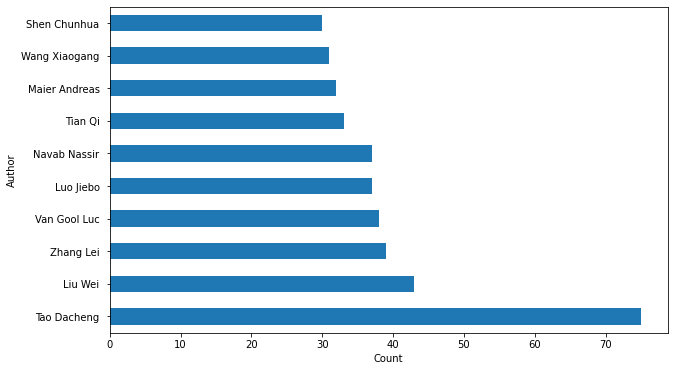

In [16]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

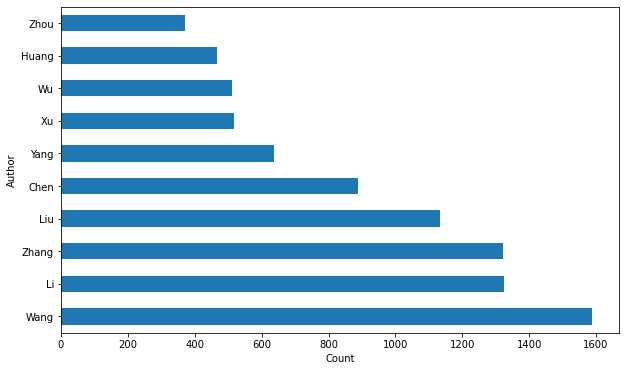

In [17]:
# 接下来统计姓名姓，也就是authors_parsed字段中作者第一个单词：

authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

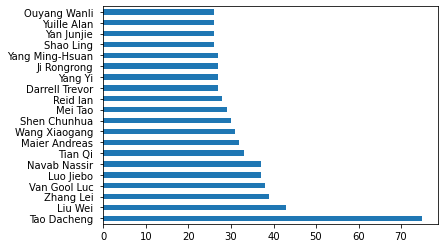

In [20]:
authors_names[0].value_counts().head(20).plot(kind='barh')

In [23]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.
